## PCA of Weather Data



In [6]:
# 0. Load libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.preprocessing
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [7]:
# 1. Load data
MASTER_PATH = "/Users/moritzknodler/Documents/00_Lectures/0_Fall 2025/ML/z_Project/Flight data/thermals/thermals_master_with_weather.csv"

master_df = pd.read_csv(MASTER_PATH)

# Display first few rows
display(master_df.head())

# Show all column names as comma-separated string
print(", ".join(master_df.columns))

# Create weather df
weather_cols = [
    "temperature_2m",
    "dewpoint_2m",
    "windspeed_10m",
    "winddirection_10m",
    "cloudcover_low",
    "cloudcover_mid",
    "cloudcover_high",
    "shortwave_radiation",
    "boundary_layer_height"
]

weather_df = master_df[weather_cols].copy()

weather_df.describe().T.round(2)



,thermal_id,flight_id,start_datetime,start_time,end_time,duration_s,avg_climb,max_climb,climb_std,avg_turn_radius,...,time,temperature_2m,dewpoint_2m,windspeed_10m,winddirection_10m,cloudcover_low,cloudcover_mid,cloudcover_high,shortwave_radiation,boundary_layer_height
0,1,3007255,2022-02-13 12:15:01,2735,3030,251,1.445575,2.6,0.631151,450955.312477,...,2022-02-13 12:00:00,1.8,-9.1,3.7,349.0,0.0,0.0,0.0,545.0,355.0
1,2,3007255,2022-02-13 12:21:20,3114,3147,23,0.823119,1.6,0.354334,29.269215,...,2022-02-13 12:00:00,0.9,-10.0,3.7,349.0,0.0,0.0,0.0,545.0,355.0
2,3,3007255,2022-02-13 12:25:37,3371,3463,67,1.743646,5.2,1.185881,23.452654,...,2022-02-13 12:00:00,2.0,-8.9,3.7,349.0,0.0,0.0,0.0,545.0,255.0
3,4,3007255,2022-02-13 12:31:56,3750,3866,99,1.078976,2.4,0.563373,24.250999,...,2022-02-13 13:00:00,2.6,-11.0,3.3,6.0,0.0,0.0,0.0,522.0,250.0
4,5,3007255,2022-02-13 12:34:43,3917,4072,99,0.863319,1.0,0.307944,-36.463323,...,2022-02-13 13:00:00,2.6,-11.0,3.3,6.0,0.0,0.0,0.0,522.0,250.0


thermal_id, flight_id, start_datetime, start_time, end_time, duration_s, avg_climb, max_climb, climb_std, avg_turn_radius, avg_turn, turn_std, lat_center, lon_center, entry_alt, exit_alt, alt_gain, thermal_quality, time, temperature_2m, dewpoint_2m, windspeed_10m, winddirection_10m, cloudcover_low, cloudcover_mid, cloudcover_high, shortwave_radiation, boundary_layer_height


,count,mean,std,min,25%,50%,75%,max
temperature_2m,7883.0,16.84,5.68,-8.8,14.2,17.6,20.5,31.1
dewpoint_2m,7883.0,5.25,5.55,-17.6,2.6,6.1,9.0,19.3
windspeed_10m,7883.0,5.82,2.41,0.2,4.2,5.6,7.4,16.1
winddirection_10m,7883.0,179.38,119.40,2.0,63.0,172.0,308.5,360.0
cloudcover_low,7883.0,10.48,22.03,0.0,0.0,1.0,9.0,100.0
cloudcover_mid,7883.0,19.95,22.76,0.0,1.0,14.0,29.0,100.0
cloudcover_high,7883.0,22.63,34.24,0.0,0.0,1.0,37.0,100.0
shortwave_radiation,7883.0,715.01,131.33,71.0,651.0,737.0,807.0,1017.0
boundary_layer_height,7883.0,1419.69,667.35,0.0,1160.0,1530.0,1885.0,3065.0


,count,mean,std,min,25%,50%,75%,max
temperature_2m,7883.0,0.0,1.0,-4.51,-0.46,0.13,0.65,2.51
dewpoint_2m,7883.0,-0.0,1.0,-4.12,-0.48,0.15,0.68,2.53
windspeed_10m,7883.0,0.0,1.0,-2.33,-0.67,-0.09,0.66,4.27
winddirection_10m,7883.0,-0.0,1.0,-1.49,-0.97,-0.06,1.08,1.51
cloudcover_low,7883.0,0.0,1.0,-0.48,-0.48,-0.43,-0.07,4.06
cloudcover_mid,7883.0,0.0,1.0,-0.88,-0.83,-0.26,0.40,3.52
cloudcover_high,7883.0,-0.0,1.0,-0.66,-0.66,-0.63,0.42,2.26
shortwave_radiation,7883.0,-0.0,1.0,-4.90,-0.49,0.17,0.70,2.30
boundary_layer_height,7883.0,0.0,1.0,-2.13,-0.39,0.17,0.70,2.47


/var/folders/zn/2ym95l4n2131dptxjp4dk3fh0000gn/T/ipykernel_42156/4217606335.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


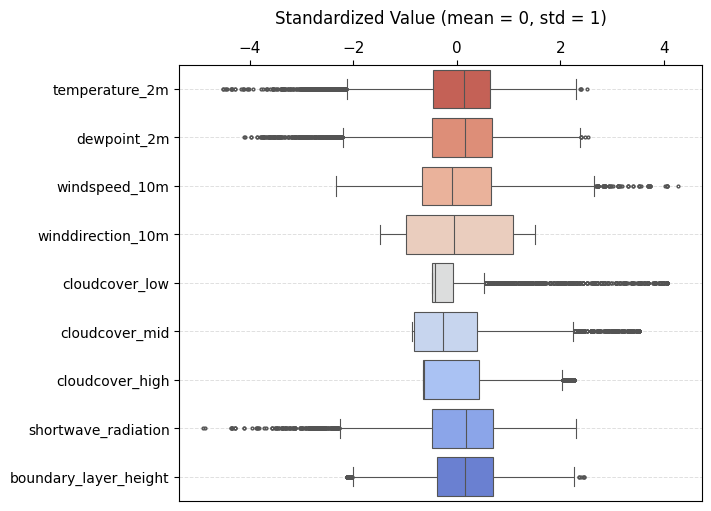

In [8]:
# 2. Standardize weather data
scaler = StandardScaler()
weather_scaled = scaler.fit_transform(weather_df)
weather_scaled_df = pd.DataFrame(weather_scaled, columns=weather_cols)
display(weather_scaled_df.describe().T.round(2))

import seaborn as sns
import matplotlib.pyplot as plt

# Melt standardized data for seaborn
weather_melted = weather_scaled_df.melt(var_name="Variable", value_name="Value")

plt.figure(figsize=(7, 5))
sns.boxplot(
    data=weather_melted,
    y="Variable",
    x="Value",
    orient="h",
    fliersize=2,
    linewidth=0.8,
    palette="coolwarm_r"  # reversed color palette
)

# Styling
plt.xlabel("Standardized Value (mean = 0, std = 1)", fontsize=12, labelpad=12)
plt.ylabel("")
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=11)
plt.grid(alpha=0.4, axis='y', linestyle='--', linewidth=0.7)

# Move x-label and ticks to top
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()

# Tight layout for compact appearance
plt.tight_layout(pad=0.3)
plt.show()

In [9]:
# Save data sample for sharing


# Display the first few rows to confirm
display(weather_scaled_df.head())

# Save the first 30 rows as a representative sample
weather_scaled_df.head(30).to_csv("sample_pre_pca_dataset.csv", index=False)

,temperature_2m,dewpoint_2m,windspeed_10m,winddirection_10m,cloudcover_low,cloudcover_mid,cloudcover_high,shortwave_radiation,boundary_layer_height
0,-2.647854,-2.587851,-0.880755,1.420758,-0.475763,-0.876582,-0.661007,-1.294656,-1.595491
1,-2.806347,-2.750124,-0.880755,1.420758,-0.475763,-0.876582,-0.661007,-1.294656,-1.595491
2,-2.612633,-2.551791,-0.880755,1.420758,-0.475763,-0.876582,-0.661007,-1.294656,-1.745346
3,-2.506971,-2.930427,-1.046948,-1.452204,-0.475763,-0.876582,-0.661007,-1.469800,-1.752839
4,-2.506971,-2.930427,-1.046948,-1.452204,-0.475763,-0.876582,-0.661007,-1.469800,-1.752839


In [10]:
# 3. Perform PCA


# Run PCA on standardized weather data
pca = PCA(n_components=5)
weather_pca = pca.fit_transform(weather_scaled_df)

# Create PCA DataFrame
weather_pca_df = pd.DataFrame(weather_pca, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
display(weather_pca_df.describe().T.round(2))

# Calculate explained variance
explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

# Create summary DataFrame
summary_df = pd.DataFrame({
    "Principal Component": [f"PC{i+1}" for i in range(len(explained_var))],
    "Explained Variance (%)": explained_var * 100,
    "Cumulative Variance (%)": cumulative_var * 100
})

display(summary_df.round(2))

,count,mean,std,min,25%,50%,75%,max
PC1,7883.0,-0.0,1.45,-6.16,-0.74,0.32,0.99,2.98
PC2,7883.0,0.0,1.23,-2.58,-0.80,-0.16,0.56,6.10
PC3,7883.0,0.0,1.09,-3.68,-0.69,-0.11,0.73,3.66
PC4,7883.0,-0.0,0.99,-2.26,-0.79,-0.14,0.81,3.01
PC5,7883.0,0.0,0.98,-3.42,-0.64,-0.05,0.60,3.80


,Principal Component,Explained Variance (%),Cumulative Variance (%)
0,PC1,23.26,23.26
1,PC2,16.70,39.96
2,PC3,13.12,53.09
3,PC4,10.98,64.07
4,PC5,10.63,74.69


In [11]:
# Save data sample for sharing


# Display the first few rows to confirm
display(weather_pca_df.head())

# Save the first 30 rows as a representative sample
weather_pca_df.head(30).to_csv("sample_pca_dataset.csv", index=False)

,PC1,PC2,PC3,PC4,PC5
0,-3.859970,-1.348722,0.926606,1.771689,-0.895578
1,-4.055338,-1.415200,0.881990,1.806916,-0.890958
2,-3.867195,-1.309934,1.010626,1.762477,-0.872941
3,-4.445045,-1.459673,0.587519,-0.781799,0.051703
4,-4.445045,-1.459673,0.587519,-0.781799,0.051703


Text(0.5, 0, 'Principal Component')

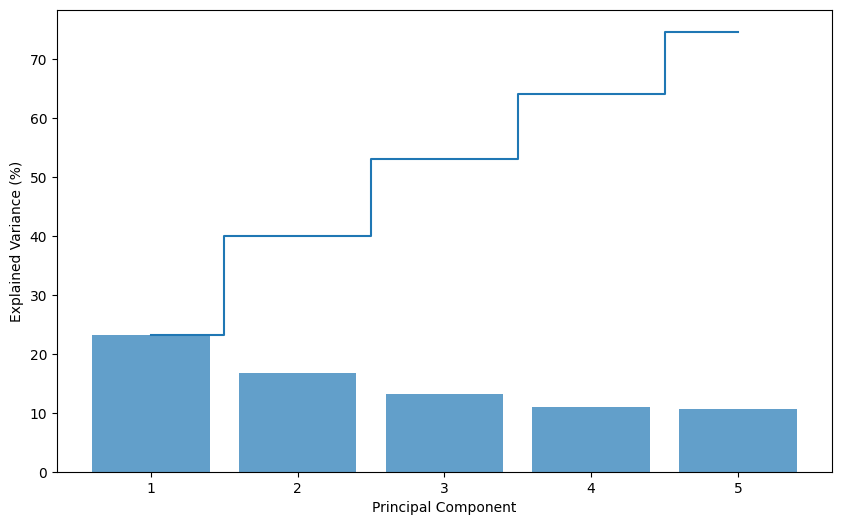

In [5]:
# 4. Plot explained variance

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_var) + 1), explained_var * 100, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_var) + 1), cumulative_var * 100, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained Variance (%)')
plt.xlabel('Principal Component')                   

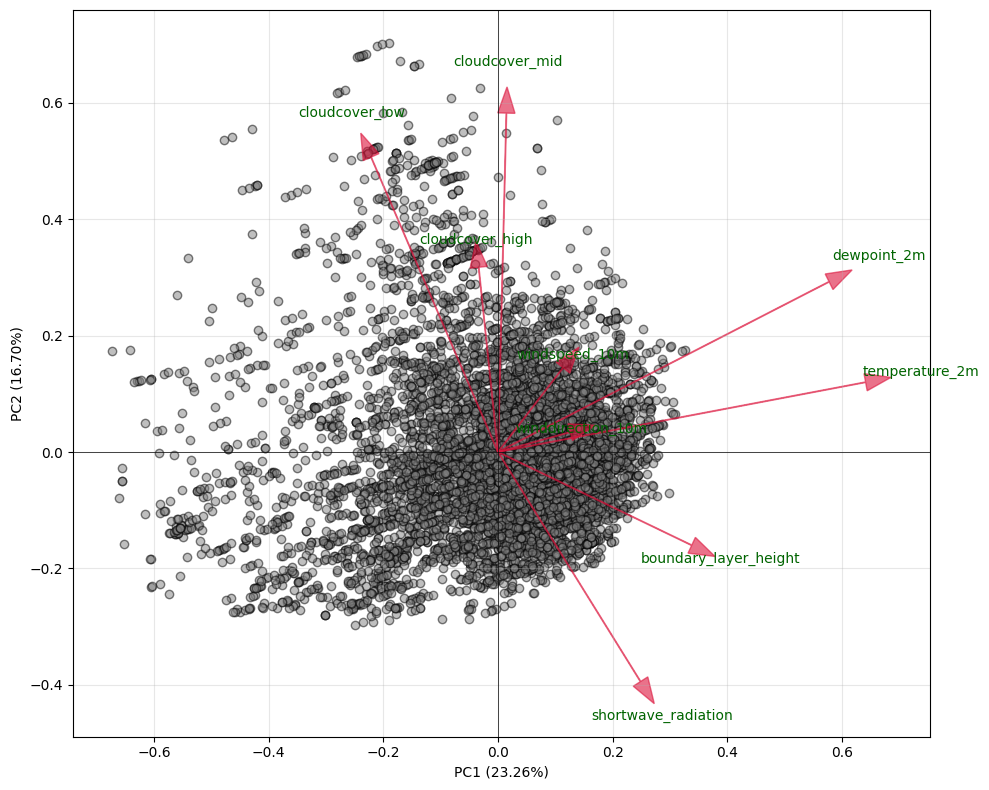

In [6]:
import matplotlib.pyplot as plt

# 5. Plot biplot
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())

    plt.figure(figsize=(10, 8))
    plt.scatter(xs * scalex, ys * scaley, c='gray', alpha=0.5, edgecolors='k')
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1],
                  color='crimson', alpha=0.6, head_width=0.03)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15,
                     f"Var{i+1}", color='darkgreen', ha='center', va='center', fontsize=10)
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15,
                     labels[i], color='darkgreen', ha='center', va='center', fontsize=10)

    plt.xlabel("PC1 (%.2f%%)" % (explained_var[0] * 100))
    plt.ylabel("PC2 (%.2f%%)" % (explained_var[1] * 100))
   
    plt.grid(alpha=0.3)
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.tight_layout()
    plt.show()

# Run it:
biplot(weather_pca, pca.components_.T, labels=weather_cols)

In [10]:
# --- 1. Make sure both dataframes have same length
print("Master rows:", len(master_df))
print("PCA rows:", len(weather_pca_df))

# --- 2. Add PCA columns to master (row-wise alignment)
df_pca = pd.concat([master_df.reset_index(drop=True), weather_pca_df], axis=1)

# --- 3. Inspect new dataframe
print("\n✅ Combined dataset shape:", df_pca.shape)
display(df_pca.head())

# --- 4. Save to CSV
OUTPUT_PCA_PATH = "/Users/moritzknodler/Documents/00_Lectures/0_Fall 2025/ML/z_Project/Flight data/thermals/thermals_master_with_weather_PCA.csv"
df_pca.to_csv(OUTPUT_PCA_PATH, index=False)
print(f"💾 PCA-merged file saved to:\n{OUTPUT_PCA_PATH}")

Master rows: 7883
PCA rows: 7883

✅ Combined dataset shape: (7883, 33)


,thermal_id,flight_id,start_datetime,start_time,end_time,duration_s,avg_climb,max_climb,climb_std,avg_turn_radius,...,cloudcover_low,cloudcover_mid,cloudcover_high,shortwave_radiation,boundary_layer_height,PC1,PC2,PC3,PC4,PC5
0,1,3007255,2022-02-13 12:15:01,2735,3030,251,1.445575,2.6,0.631151,450955.312477,...,0.0,0.0,0.0,545.0,355.0,-3.859970,-1.348722,0.926606,1.771689,-0.895578
1,2,3007255,2022-02-13 12:21:20,3114,3147,23,0.823119,1.6,0.354334,29.269215,...,0.0,0.0,0.0,545.0,355.0,-4.055338,-1.415200,0.881990,1.806916,-0.890958
2,3,3007255,2022-02-13 12:25:37,3371,3463,67,1.743646,5.2,1.185881,23.452654,...,0.0,0.0,0.0,545.0,255.0,-3.867195,-1.309934,1.010626,1.762477,-0.872941
3,4,3007255,2022-02-13 12:31:56,3750,3866,99,1.078976,2.4,0.563373,24.250999,...,0.0,0.0,0.0,522.0,250.0,-4.445045,-1.459673,0.587519,-0.781799,0.051703
4,5,3007255,2022-02-13 12:34:43,3917,4072,99,0.863319,1.0,0.307944,-36.463323,...,0.0,0.0,0.0,522.0,250.0,-4.445045,-1.459673,0.587519,-0.781799,0.051703


💾 PCA-merged file saved to:
/Users/moritzknodler/Documents/00_Lectures/0_Fall 2025/ML/z_Project/Flight data/thermals/thermals_master_with_weather_PCA.csv


In [16]:
# Display first rows of weather data with thermal_id
display(master_df[["thermal_id"] + weather_cols].head().round(2))

# Add thermal_id to PCA DataFrame
weather_pca_df_with_id = pd.concat([master_df[["thermal_id"]].reset_index(drop=True), weather_pca_df], axis=1)

# Display first rows, rounded to 2 decimals
display(weather_pca_df_with_id.head().round(2))

,thermal_id,temperature_2m,dewpoint_2m,windspeed_10m,winddirection_10m,cloudcover_low,cloudcover_mid,cloudcover_high,shortwave_radiation,boundary_layer_height
0,1,1.8,-9.1,3.7,349.0,0.0,0.0,0.0,545.0,355.0
1,2,0.9,-10.0,3.7,349.0,0.0,0.0,0.0,545.0,355.0
2,3,2.0,-8.9,3.7,349.0,0.0,0.0,0.0,545.0,255.0
3,4,2.6,-11.0,3.3,6.0,0.0,0.0,0.0,522.0,250.0
4,5,2.6,-11.0,3.3,6.0,0.0,0.0,0.0,522.0,250.0


,thermal_id,PC1,PC2,PC3,PC4,PC5
0,1,-3.86,-1.35,0.93,1.77,-0.90
1,2,-4.06,-1.42,0.88,1.81,-0.89
2,3,-3.87,-1.31,1.01,1.76,-0.87
3,4,-4.45,-1.46,0.59,-0.78,0.05
4,5,-4.45,-1.46,0.59,-0.78,0.05


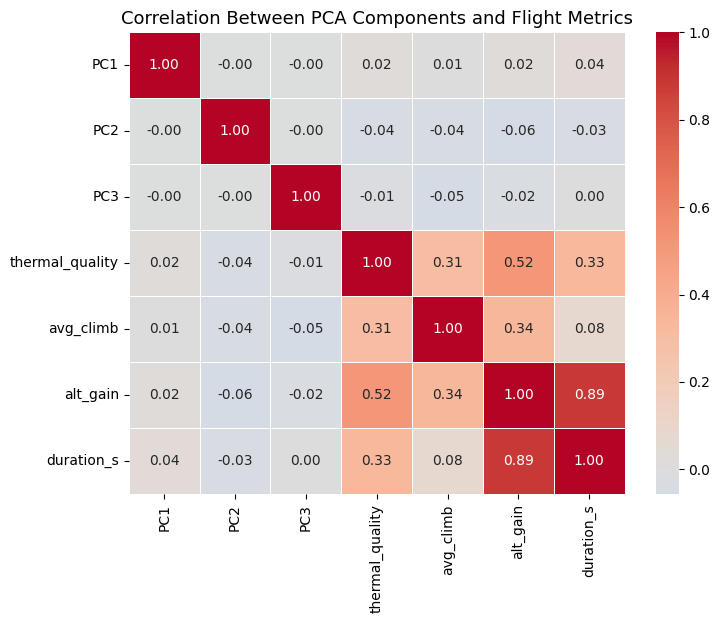

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pick relevant columns
corr_cols = ["PC1", "PC2", "PC3", "thermal_quality", "avg_climb", "alt_gain", "duration_s"]

# Compute correlation matrix
corr = df_pca[corr_cols].corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f", linewidths=0.5)
plt.title("Correlation Between PCA Components and Flight Metrics", fontsize=13)
plt.show()